In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaboostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [3]:
original_dataset = pd.read_csv("C:/Users/shubhamg/Downloads/german.data", sep="\s+", header= None)


In [4]:
print(original_dataset)

      0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0    A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1    A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2    A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3    A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4    A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   
..   ...  ..  ...  ...   ...  ...  ...  ..  ...   ...  ...   ...  ..   ...   
995  A14  12  A32  A42  1736  A61  A74   3  A92  A101  ...  A121  31  A143   
996  A11  30  A32  A41  3857  A61  A73   4  A91  A101  ...  A122  40  A143   
997  A14  12  A32  A43   804  A61  A75   4  A93  A101  ...  A123  38  A143   
998  A11  45  A32  A43  1845  A61  A73   4  A93  A101  ...  A124  23  A143   
999  A12  45  A34  A41  4576  A62  A71   3  A93  A101  ...  A123  27  A143   

       14 15    16 17    18    19 20  
0    A152  2  A173  1  A

In [5]:
original_dataset.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
original_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
german = original_dataset # Creating a copy of original dataset

In [8]:
german.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
german.columns = ["account.status",'months','credit.history','purpose','credit.amount','savings','employment','installment.rate','personal.status','guarantors','residence','property','age','other.installments','housing','credit.cards','job','dependents','phone','foreign.worker','credit.rating']

In [10]:
german.head()

,account.status,months,credit.history,purpose,credit.amount,savings,employment,installment.rate,personal.status,guarantors,...,property,age,other.installments,housing,credit.cards,job,dependents,phone,foreign.worker,credit.rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [11]:
german.isnull().sum().max() #Checking the presence of any NA 

0

**Default is a serious credit card status that affects not only your standing with that credit card issuer but also your credit standing in general and your ability to get approved for other credit-based services**

In [12]:
german["credit.rating"].value_counts()
# People who did not default(1) vs people who defaulted(2)

1    700
2    300
Name: credit.rating, dtype: int64

In [13]:
print('People who Not Defaulted', round(german['credit.rating'].value_counts()[1]/len(german) * 100,2), '% of the dataset')
print('People who Defaulted', round(german['credit.rating'].value_counts()[2]/len(german) * 100,2), '% of the dataset')

People who Not Defaulted 70.0 % of the dataset
People who Defaulted 30.0 % of the dataset


**As we can see their is fair amount of people who are not defaulted and thus this is a good indication that the credit score of these 70% people will not get affected and they will have healthy credit score as of now, this also means that is quite balanced**

C:\Users\shubhamg\Anaconda3\envs\gpulearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

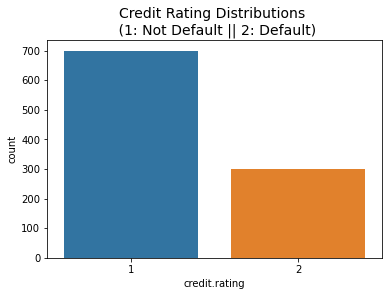

In [14]:
sns.countplot('credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

Text(0.5, 1.0, 'Distribution based on Credit Rating \n (1: Not Default || 2: Default)')

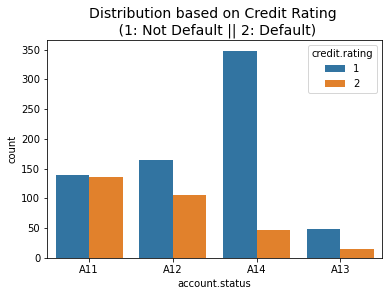

In [15]:
sns.countplot(x = 'account.status', hue = 'credit.rating', data=german)
plt.title('Distribution based on Credit Rating \n (1: Not Default || 2: Default)', fontsize=14)

**Here people with less than 0DM (A11) category are most risky customers and interestingly people with no checking account (A14) are the safest one**

Text(0.5, 1.0, 'Distribution based on Credit Rating \n (1: Not Default || 2: Default)')

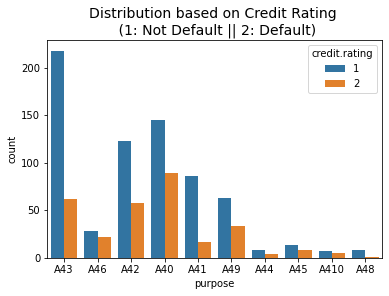

In [16]:
sns.countplot(x = 'purpose', hue = 'credit.rating', data=german)
plt.title('Distribution based on Credit Rating \n (1: Not Default || 2: Default)', fontsize=14)

**Although, this isn't serving our purpose much but customers with purposes like domestic appliance, rpairs, educaation and others are not the kind of customer company should go for**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

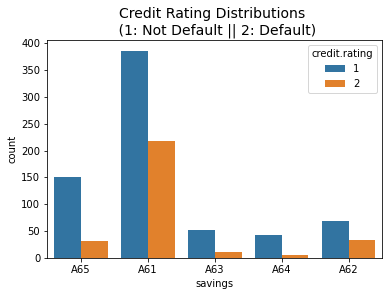

In [17]:
sns.countplot(x = 'savings', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Savings isn't a correct parameter to categorise a customer safe or not**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

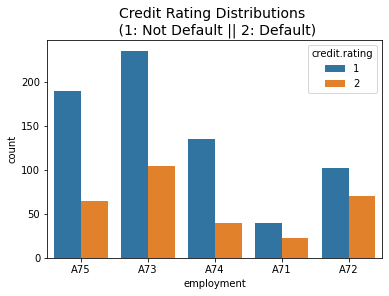

In [18]:
sns.countplot(x = 'employment', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Employment plays a vital role on getting credit business up and running, and its evidient that the worst performing group are the ones who are unemployed**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

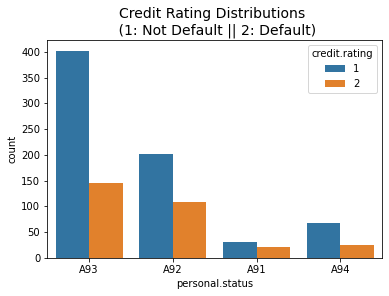

In [19]:
sns.countplot(x = 'personal.status', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**People who are either separated or divorced (A91), are the ones who are not at all stable economically either they might have to give 'Alimony' or the joint family income is no more and he is under great burder of credit. Potentially these customers are also not safe for our business**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

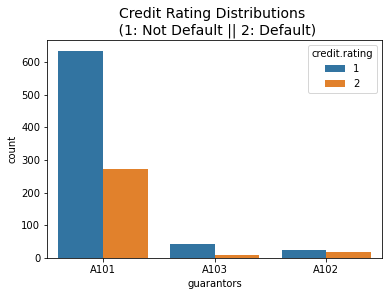

In [20]:
sns.countplot(x = 'guarantors', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**It's very rare that the co-applicants are supportive in repayment of any credit burden, generally they are their just to share their tax burden and get any special benefits if eligible. Again such applicants are not the safest ones**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

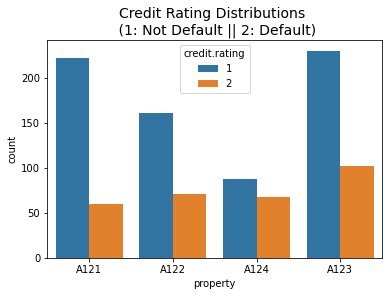

In [21]:
sns.countplot(x = 'property', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Customers with unknown or no property (A124) are again the risky customers**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

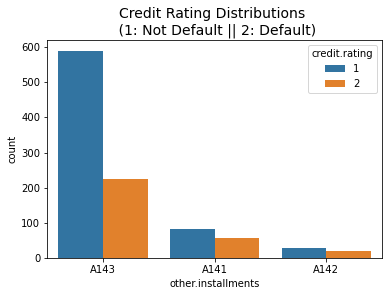

In [22]:
sns.countplot(x = 'other.installments', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Borrowing from stores and other sources (A142 & A143) are also not a good indication for the ideal customers as we aren't sure about the nature of debt and repayment model and history of it**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

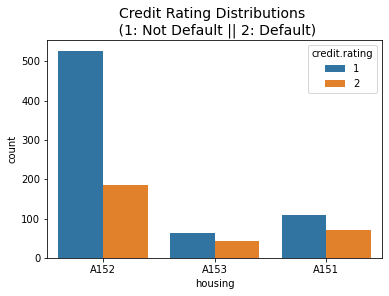

In [23]:
sns.countplot(x = 'housing', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Customers with either with no house or rented space again are not the safest customers**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

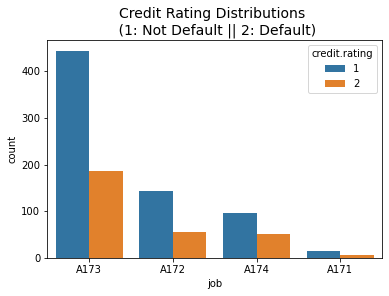

In [24]:
sns.countplot(x = 'job', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Here Unemployed/unskilled (A171) are very risky customers**

Text(0.5, 1.0, 'Credit Rating Distributions \n (1: Not Default || 2: Default)')

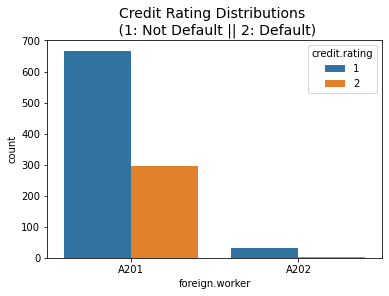

In [25]:
sns.countplot(x = 'foreign.worker', hue = 'credit.rating', data=german)
plt.title('Credit Rating Distributions \n (1: Not Default || 2: Default)', fontsize=14)

**Whether you're a foreign worker or not that doen't have much impact in lending the customer into default or not default category**

C:\Users\shubhamg\Anaconda3\envs\gpulearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubhamg\Anaconda3\envs\gpulearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


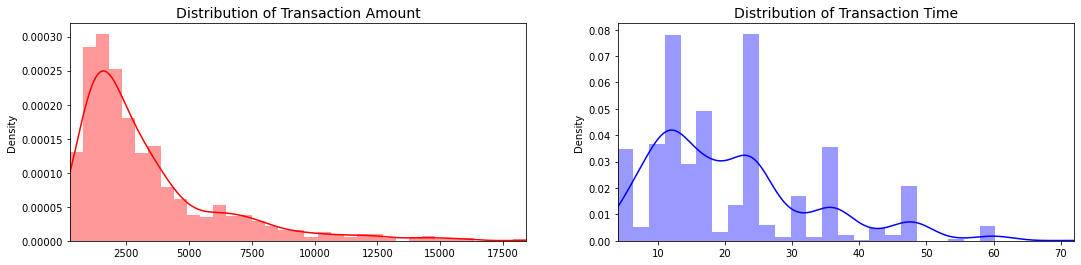

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = german['credit.amount'].values
duration_val = german['months'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(duration_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(duration_val), max(duration_val)])

plt.show()

In [27]:
# Since most of our data has already been scaled we should scale the columns
# that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

german['scaled_amount'] = rob_scaler.fit_transform(german['credit.amount'].values.reshape(-1,1))
german['scaled_duration'] = rob_scaler.fit_transform(german['months'].values.reshape(-1,1))

german.drop(['months','credit.amount'], axis=1, inplace=True)

In [28]:
scaled_amount = german['scaled_amount']
scaled_duration = german['scaled_duration']

german.drop(['scaled_amount', 'scaled_duration'], axis=1, inplace=True)
german.insert(0, 'scaled_amount', scaled_amount)
german.insert(1, 'scaled_duration', scaled_duration)

# Amount and Duration are now Scaled!

german.head()

,scaled_amount,scaled_duration,account.status,credit.history,purpose,savings,employment,installment.rate,personal.status,guarantors,...,property,age,other.installments,housing,credit.cards,job,dependents,phone,foreign.worker,credit.rating
0,-0.441354,-1.0,A11,A34,A43,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,1.393114,2.5,A12,A32,A43,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,-0.085739,-0.5,A14,A34,A46,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,2.133883,2.0,A11,A32,A42,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,0.978421,0.5,A11,A33,A40,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [29]:
print('People who Not Defaulted', round(german['credit.rating'].value_counts()[1]/len(german) * 100,2), '% of the dataset')
print('People who Defaulted', round(german['credit.rating'].value_counts()[2]/len(german) * 100,2), '% of the dataset')

X = german.drop('credit.rating', axis=1)
y = german['credit.rating']

#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
sss = StratifiedKFold(n_splits=5)
sss.get_n_splits(X, y)

print(sss)



People who Not Defaulted 70.0 % of the dataset
People who Defaulted 30.0 % of the dataset
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [30]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [193 196 198 200 201 202 204 205 206 207 208 209 210 211 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [31]:
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [32]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)


print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.7 0.3]
[0.7 0.3]


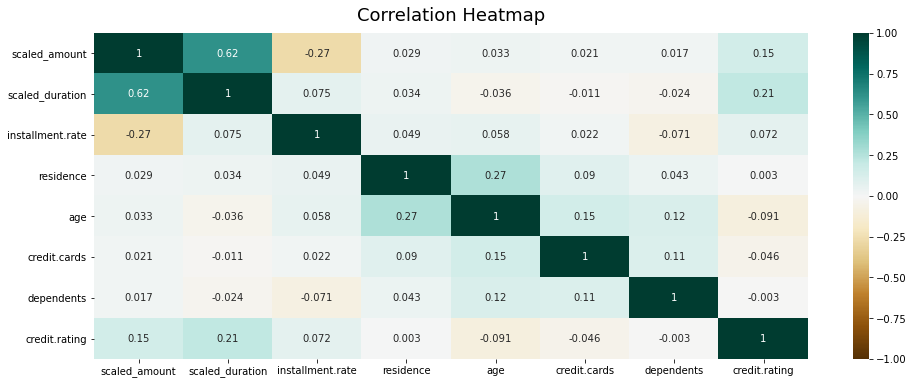

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(german.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

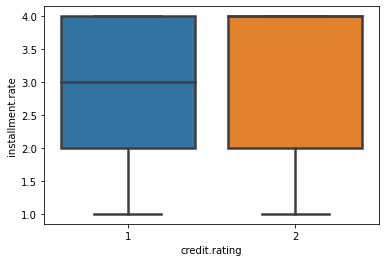

In [34]:
ax = sns.boxplot(x="credit.rating", y="installment.rate", data=german, linewidth=2.5)

C:\Users\shubhamg\Anaconda3\envs\gpulearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


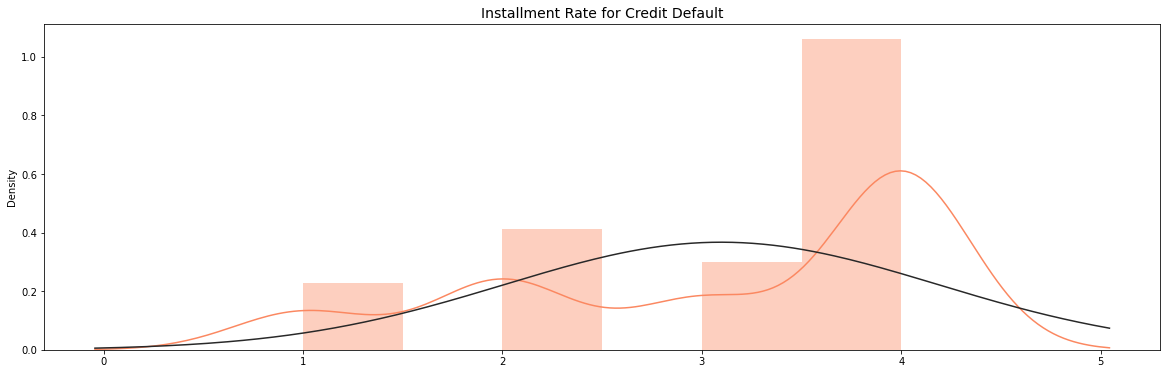

In [35]:
from scipy.stats import norm

f, (ax1) = plt.subplots(1,1, figsize=(20, 6))

installment_rate_distribution = german['installment.rate'].loc[german['credit.rating'] == 2].values
sns.distplot(installment_rate_distribution,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Installment Rate for Credit Default', fontsize=14)

plt.show()

In [36]:
installment_rate = german['installment.rate'].loc[german['credit.rating'] == 1].values
q25, q75 = np.percentile(installment_rate, 25), np.percentile(installment_rate, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
installment_rate_iqr = q75 - q25
print('iqr: {}'.format(installment_rate_iqr))

installment_rate_cut_off = installment_rate_iqr * 1.5
installment_rate_lower, installment_rate_upper = q25 - installment_rate_cut_off, q75 + installment_rate_cut_off
print('Cut Off: {}'.format(installment_rate_cut_off))
print('installment_rate Lower: {}'.format(installment_rate_lower))
print('installment_rate Upper: {}'.format(installment_rate_upper))

outliers = [x for x in installment_rate if x < installment_rate_lower or x > installment_rate_upper]
print('Feature installment_rate Outliers : {}'.format(len(outliers)))
#print('V10 outliers:{}'.format(outliers))

german = german.drop(german[(german['installment.rate'] > installment_rate_upper) | (german['installment.rate'] < installment_rate_lower)].index)


Quartile 25: 2.0 | Quartile 75: 4.0
iqr: 2.0
Cut Off: 3.0
installment_rate Lower: -1.0
installment_rate Upper: 7.0
Feature installment_rate Outliers : 0


Text(0.5, 1.0, 'installment_rate \n Reduction of outliers')

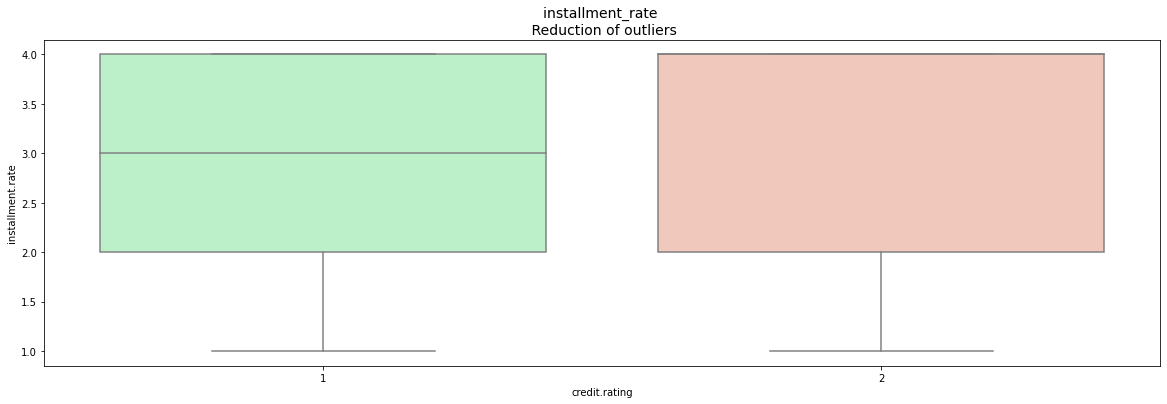

In [37]:
f,(ax1) = plt.subplots(1, 1, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# installment_rate
sns.boxplot(x="credit.rating", y="installment.rate", data=german,ax=ax1, palette=colors)
ax1.set_title("installment_rate \n Reduction of outliers", fontsize=14)
#ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),            arrowprops=dict(facecolor='black'),            fontsize=14)

In [38]:
new_german = pd.read_csv("C:/Users/shubhamg/Downloads/german.data-numeric", sep="\s+", header= None)

In [40]:
new_german.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


In [42]:
new_german.columns = ["account_status",'loan_duration_in_months','credit_history','credit_amount','savings_balance','employment_in_months','person_status_sex','present_residence','property','age_in_years','other_installment_plans','existing_credits_with_bank','liability','telephone','foreign_worker','purpose_new_car','purpose_old/used_card','debtors/guarantors_noneVSguarantors','debtors/guarantors_co-applicantVSguarantors','house_rentVSfree','house_ownsVSfree','job_unemployedVSManagement','job_unskilledVSManagement','job_skilledVSManagement','credit_rating']
# Source https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/Q8MAW8/4PKONA&version=1.0

In [43]:
new_german.head()

,account_status,loan_duration_in_months,credit_history,credit_amount,savings_balance,employment_in_months,person_status_sex,present_residence,property,age_in_years,...,purpose_new_car,purpose_old/used_card,debtors/guarantors_noneVSguarantors,debtors/guarantors_co-applicantVSguarantors,house_rentVSfree,house_ownsVSfree,job_unemployedVSManagement,job_unskilledVSManagement,job_skilledVSManagement,credit_rating
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [44]:
# Using sklearn to split your data into a training set and a testing set
X = new_german.drop('credit_rating', axis=1)
y = new_german['credit_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
dtree = DecisionTreeClassifier() #Creating the decision tree

In [46]:
dtree.fit(X_train, y_train) # Training our algorithm

DecisionTreeClassifier()

In [47]:
predictions = dtree.predict(X_test) # Testing our algorithm

In [48]:
print(confusion_matrix(y_test, predictions), '\n', classification_report(y_test, predictions)) 
#Confusion Matrix
#Classification Report

[[170  34]
 [ 51  45]] 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80       204
           2       0.57      0.47      0.51        96

    accuracy                           0.72       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.71      0.72      0.71       300



In [49]:
rfc = RandomForestClassifier(n_estimators=300) #Creating the Random Forest algorith instance

In [50]:
rfc.fit(X_train, y_train) #Training the algorithm

RandomForestClassifier(n_estimators=300)

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       0.76      0.94      0.84       204
           2       0.75      0.38      0.50        96

    accuracy                           0.76       300
   macro avg       0.76      0.66      0.67       300
weighted avg       0.76      0.76      0.73       300



In [53]:
print(confusion_matrix(y_test, predictions))

[[170  34]
 [ 51  45]]


**Results were marnginally improved when I moved from decision tree to random forest**